In [35]:
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# Data Generate X,Y
def generateDataset(m):
    X = np.random.randn(m) * 10
    noise = np.random.randn(m)
    Y = 3*X + 1 + 4 * noise
    return X,Y
#print(X.mean(), X.std())

In [30]:
X,Y = generateDataset(100)
print(X.shape, Y.shape)

(100,) (100,)


In [32]:
def plotData(X,Y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,Y,c=color)
    plt.show()

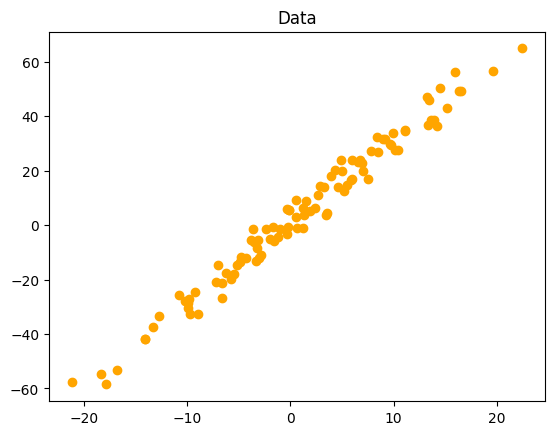

In [33]:
plotData(X,Y)